In [88]:
import json
import pandas as pd
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
 

 



In [89]:
# Opening JSON file
f = pd.read_json('featureVectorKW.json')


features_s = f['feature_vector']
fnames_s = f['fname']


features_v2 = []
new_name = []

In [90]:
for names in fnames_s:
    name = names[-19:]
    new_name.append(name)

new_name

['ISIC_0012576.nii.gz',
 'ISIC_0012585.nii.gz',
 'ISIC_0012623.nii.gz',
 'ISIC_0012627.nii.gz',
 'ISIC_0012346.nii.gz',
 'ISIC_0012255.nii.gz',
 'ISIC_0012643.nii.gz',
 'ISIC_0012633.nii.gz',
 'ISIC_0015351.nii.gz',
 'ISIC_0015294.nii.gz',
 'ISIC_0015370.nii.gz',
 'ISIC_0015462.nii.gz',
 'ISIC_0015492.nii.gz',
 'ISIC_0015480.nii.gz',
 'ISIC_0015552.nii.gz',
 'ISIC_0015518.nii.gz',
 'ISIC_0015590.nii.gz',
 'ISIC_0015634.nii.gz',
 'ISIC_0016714.nii.gz',
 'ISIC_0016351.nii.gz',
 'ISIC_0017341.nii.gz',
 'ISIC_0016804.nii.gz',
 'ISIC_0017398.nii.gz',
 'ISIC_0017399.nii.gz',
 'ISIC_0017474.nii.gz',
 'ISIC_0017460.nii.gz',
 'ISIC_0017755.nii.gz',
 'ISIC_0017702.nii.gz',
 'ISIC_0018111.nii.gz',
 'ISIC_0018179.nii.gz',
 'ISIC_0018375.nii.gz',
 'ISIC_0018248.nii.gz',
 'ISIC_0018521.nii.gz',
 'ISIC_0018472.nii.gz',
 'ISIC_0018556.nii.gz',
 'ISIC_0018611.nii.gz',
 'ISIC_0019049.nii.gz',
 'ISIC_0018680.nii.gz',
 'ISIC_0019334.nii.gz',
 'ISIC_0019309.nii.gz',
 'ISIC_0019723.nii.gz',
 'ISIC_0019794.n

In [91]:
fnames_v2 = np.array(new_name)
fnames_v2.shape

(100,)

In [92]:
for feature in features_s:
    new_feature = np.array(feature)
    features_v2.append(new_feature)

In [93]:
features_v2_array = np.array(features_v2)

In [94]:
features_v2_array.shape

(100, 1, 480, 7, 6)

In [95]:
new_arr = features_v2_array.reshape(100,-1)

In [96]:
new_arr.shape

(100, 20160)

In [97]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(new_arr)

KMeans(n_clusters=2)

In [98]:
Kmean.labels_

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [99]:
groups = {}
for file, cluster in zip(fnames_v2,Kmean.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [100]:
len(groups[1])

63

In [101]:
len(groups[0])

37

In [103]:
labels = Kmean.labels_

In [104]:
groups[1]

['ISIC_0012346.nii.gz',
 'ISIC_0012255.nii.gz',
 'ISIC_0015351.nii.gz',
 'ISIC_0015294.nii.gz',
 'ISIC_0015370.nii.gz',
 'ISIC_0015462.nii.gz',
 'ISIC_0015492.nii.gz',
 'ISIC_0015480.nii.gz',
 'ISIC_0015552.nii.gz',
 'ISIC_0015518.nii.gz',
 'ISIC_0015590.nii.gz',
 'ISIC_0015634.nii.gz',
 'ISIC_0020953.nii.gz',
 'ISIC_0021037.nii.gz',
 'ISIC_0020999.nii.gz',
 'ISIC_0021152.nii.gz',
 'ISIC_0021041.nii.gz',
 'ISIC_0021158.nii.gz',
 'ISIC_0021448.nii.gz',
 'ISIC_0021251.nii.gz',
 'ISIC_0021504.nii.gz',
 'ISIC_0021449.nii.gz',
 'ISIC_0021714.nii.gz',
 'ISIC_0021762.nii.gz',
 'ISIC_0021904.nii.gz',
 'ISIC_0021816.nii.gz',
 'ISIC_0021990.nii.gz',
 'ISIC_0021914.nii.gz',
 'ISIC_0022029.nii.gz',
 'ISIC_0022039.nii.gz',
 'ISIC_0022192.nii.gz',
 'ISIC_0022147.nii.gz',
 'ISIC_0022657.nii.gz',
 'ISIC_0022221.nii.gz',
 'ISIC_0022738.nii.gz',
 'ISIC_0023371.nii.gz',
 'ISIC_0023628.nii.gz',
 'ISIC_0023508.nii.gz',
 'ISIC_0023755.nii.gz',
 'ISIC_0023678.nii.gz',
 'ISIC_0023831.nii.gz',
 'ISIC_0023900.n

In [105]:
groups[0]

['ISIC_0012576.nii.gz',
 'ISIC_0012585.nii.gz',
 'ISIC_0012623.nii.gz',
 'ISIC_0012627.nii.gz',
 'ISIC_0012643.nii.gz',
 'ISIC_0012633.nii.gz',
 'ISIC_0016714.nii.gz',
 'ISIC_0016351.nii.gz',
 'ISIC_0017341.nii.gz',
 'ISIC_0016804.nii.gz',
 'ISIC_0017398.nii.gz',
 'ISIC_0017399.nii.gz',
 'ISIC_0017474.nii.gz',
 'ISIC_0017460.nii.gz',
 'ISIC_0017755.nii.gz',
 'ISIC_0017702.nii.gz',
 'ISIC_0018111.nii.gz',
 'ISIC_0018179.nii.gz',
 'ISIC_0018375.nii.gz',
 'ISIC_0018248.nii.gz',
 'ISIC_0018521.nii.gz',
 'ISIC_0018472.nii.gz',
 'ISIC_0018556.nii.gz',
 'ISIC_0018611.nii.gz',
 'ISIC_0019049.nii.gz',
 'ISIC_0018680.nii.gz',
 'ISIC_0019334.nii.gz',
 'ISIC_0019309.nii.gz',
 'ISIC_0019723.nii.gz',
 'ISIC_0019794.nii.gz',
 'ISIC_0020233.nii.gz',
 'ISIC_0019883.nii.gz',
 'ISIC_0020861.nii.gz',
 'ISIC_0020418.nii.gz',
 'ISIC_0020893.nii.gz',
 'ISIC_0021202.nii.gz',
 'ISIC_0036328.nii.gz']

In [106]:
from sklearn.decomposition import PCA

In [107]:
features_s
pca = PCA(2)

In [110]:
df = pca.fit_transform(new_arr)

In [111]:
df.shape

(100, 2)

In [112]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


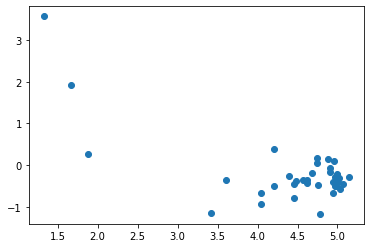

In [113]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

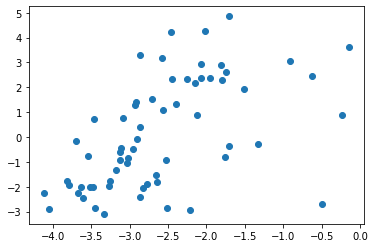

In [114]:
#filter rows of original data
filtered_label1 = df[label == 1]
 
#plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.show()

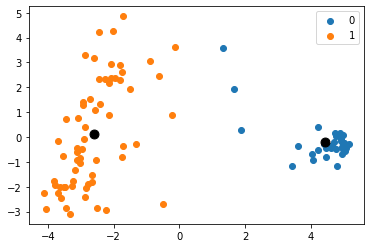

In [117]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

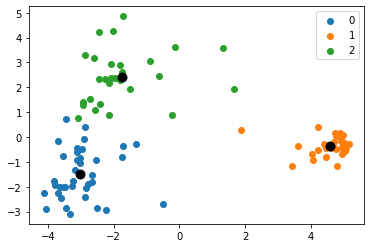

In [120]:
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

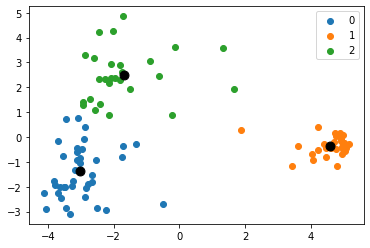

In [121]:
from sklearn.cluster import MiniBatchKMeans
MBKmeans = MiniBatchKMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = MBKmeans.fit_predict(df)
 
centroids = MBKmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

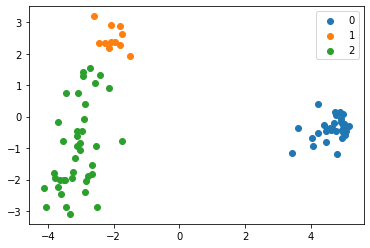

In [139]:
from sklearn.cluster import DBSCAN

DBS = DBSCAN(eps= 0.8)
#predict the labels of clusters.
label = DBS.fit_predict(df)


u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    if i > -1:
        plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

## Po więcej zapraszam na:
https://machinelearningmastery.com/clustering-algorithms-with-python/